In [1]:
!pip install -q yfinance

In [1]:
import pandas as pd
from prophet import Prophet
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
tick = '2330.TW'
start = datetime(2016, 7, 1)
end = datetime.today()

df = yf.download(tick, start, end)

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

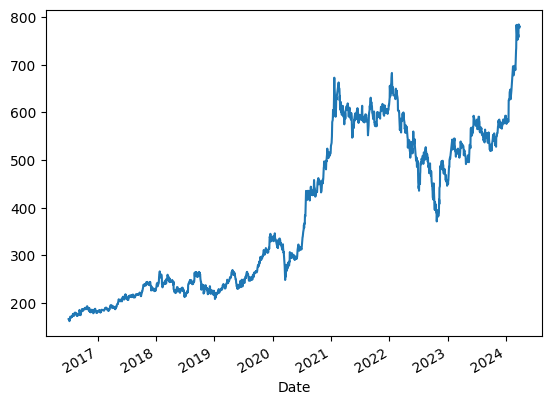

In [3]:
df['Close'].plot()

In [28]:
!pip install -q plotly

In [4]:
import plotly.offline as pyo
import plotly.express as ex
import plotly.graph_objects as go

#pyo.init_notebook_mode()

In [6]:
#declare figure
fig = go.Figure()


#Candlestick
fig.add_trace(go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'], name = 'market data'))
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=3, label="3d", step="day", stepmode="backward"),
            dict(count=5, label="5d", step="day", stepmode="backward"),
            dict(count=7, label="WTD", step="day", stepmode="todate"),
            dict(step="all")
        ])
    )
)
fig.update_layout(title='台積電 2330.TW')
fig.show()

In [3]:

df = df.reset_index()
data = df[['Date', 'Close']]
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})

In [9]:
data.tail()

,ds,y
1879,2024-03-21,784.0
1880,2024-03-22,785.0
1881,2024-03-25,780.0
1882,2024-03-26,782.0
1883,2024-03-27,779.0


In [12]:
m = Prophet()

In [13]:
m.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1g19b5zb/e7y9qg39.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1g19b5zb/vr_sf5l1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34936', 'data', 'file=/tmp/tmp1g19b5zb/e7y9qg39.json', 'init=/tmp/tmp1g19b5zb/vr_sf5l1.json', 'output', 'file=/tmp/tmp1g19b5zb/prophet_modelzhtgnp56/prophet_model-20240328132826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:28:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:28:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
future = m.make_future_dataframe(periods=30)

In [15]:
forecast = m.predict(future)

In [ ]:
future = m2.make_future_dataframe(periods=30)
forecast2 = m2.predict(future)

fig1 = m.plot(forecast)
plt.title(f'{tick} Stock Price Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Stock Price (NT $)')
plt.legend()
plt.show()

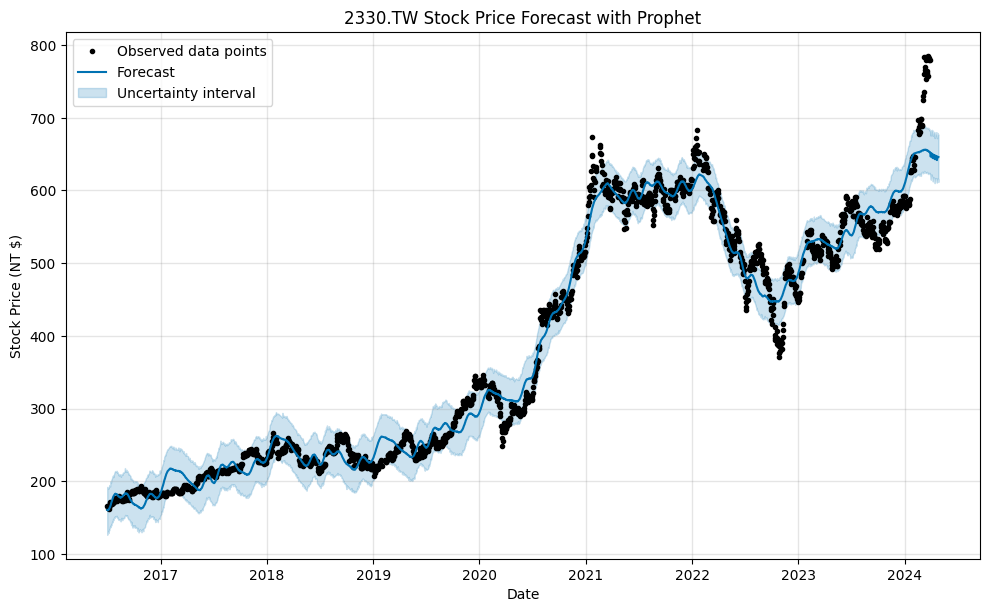

In [16]:
# Visualize the forecast
fig1 = m.plot(forecast)
# Add title to the plot
plt.title(f'{tick} Stock Price Forecast with Prophet')
# Label the x-axis
plt.xlabel('Date')
# Label the y-axis
plt.ylabel('Stock Price (NT $)')
# Display the plot
plt.legend()
plt.show()

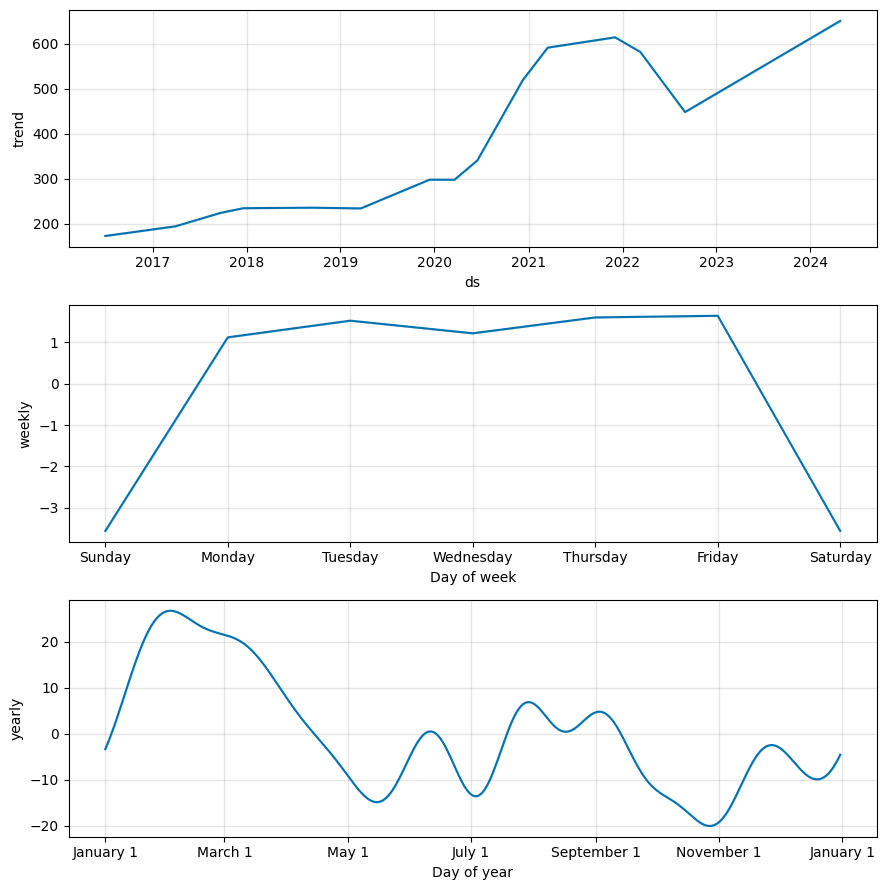

In [17]:
# Visualize components of the forecast
fig2 = m.plot_components(forecast)
plt.show()

In [20]:
split_date = "2023-11-30"
df_train = data.loc[data.ds <= split_date].copy()
df_test = data.loc[data.ds > split_date].copy()

In [21]:
model = Prophet()
# fit the training data
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphbsx6sjf/vz10a4b3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphbsx6sjf/oy_1f8sd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66864', 'data', 'file=/tmp/tmphbsx6sjf/vz10a4b3.json', 'init=/tmp/tmphbsx6sjf/oy_1f8sd.json', 'output', 'file=/tmp/tmphbsx6sjf/prophet_modelgsukhbe6/prophet_model-20240328124708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:47:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:47:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
forecast = model.predict(df_test)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
70,2024-03-21,574.578467,541.699826,615.258414,560.178917,592.514799,2.952147,2.952147,2.952147,2.116836,2.116836,2.116836,0.835311,0.835311,0.835311,0.0,0.0,0.0,577.530614
71,2024-03-22,574.726958,540.670939,614.841458,559.810548,593.333095,2.953247,2.953247,2.953247,2.029546,2.029546,2.029546,0.923701,0.923701,0.923701,0.0,0.0,0.0,577.680205
72,2024-03-25,575.172429,542.390053,616.436334,559.889736,594.165625,2.979678,2.979678,2.979678,1.346550,1.346550,1.346550,1.633128,1.633128,1.633128,0.0,0.0,0.0,578.152107
73,2024-03-26,575.320920,541.731672,616.987329,559.696153,594.629365,3.748450,3.748450,3.748450,1.759760,1.759760,1.759760,1.988690,1.988690,1.988690,0.0,0.0,0.0,579.069370
74,2024-03-27,575.469410,546.330966,616.359268,559.525411,595.191614,4.269009,4.269009,4.269009,1.882327,1.882327,1.882327,2.386682,2.386682,2.386682,0.0,0.0,0.0,579.738419


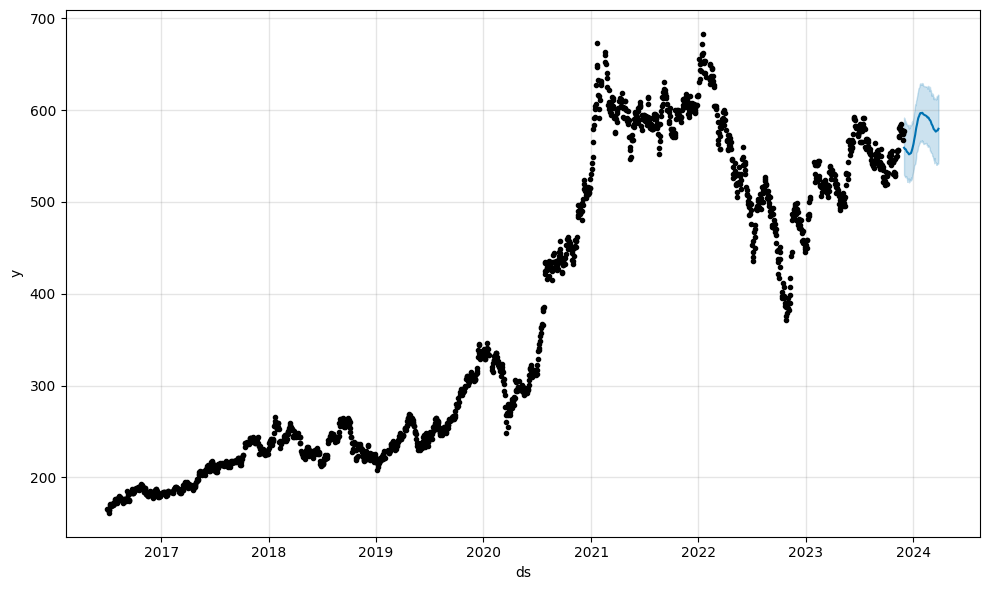

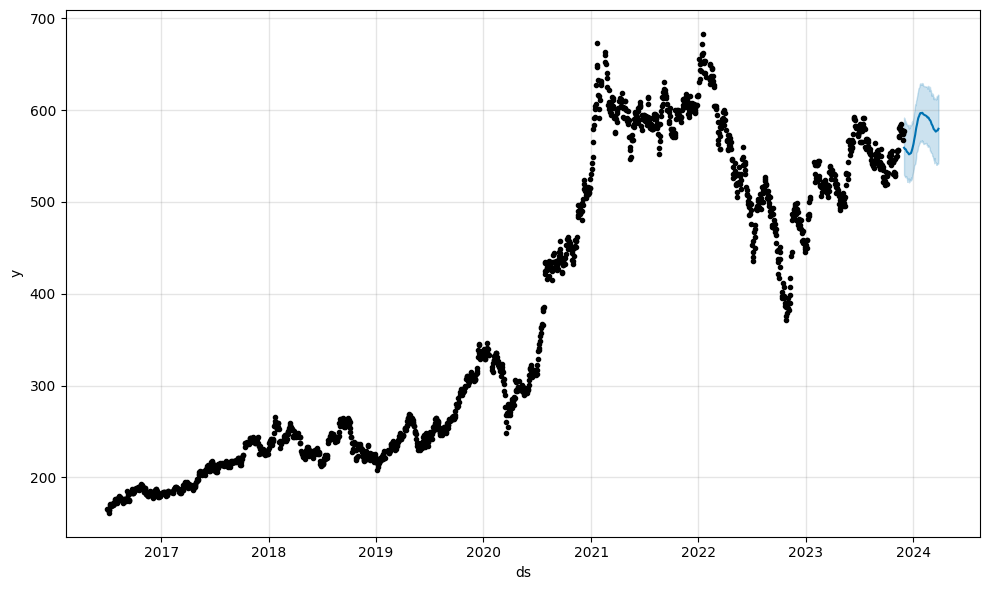

In [23]:
model.plot(forecast)

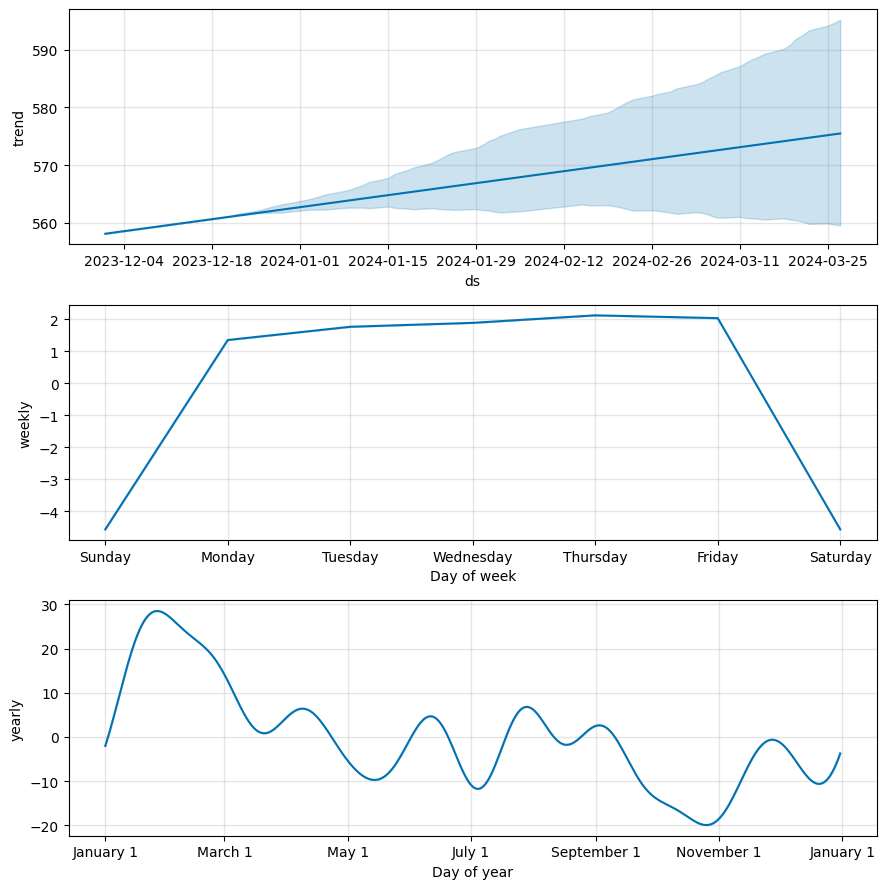

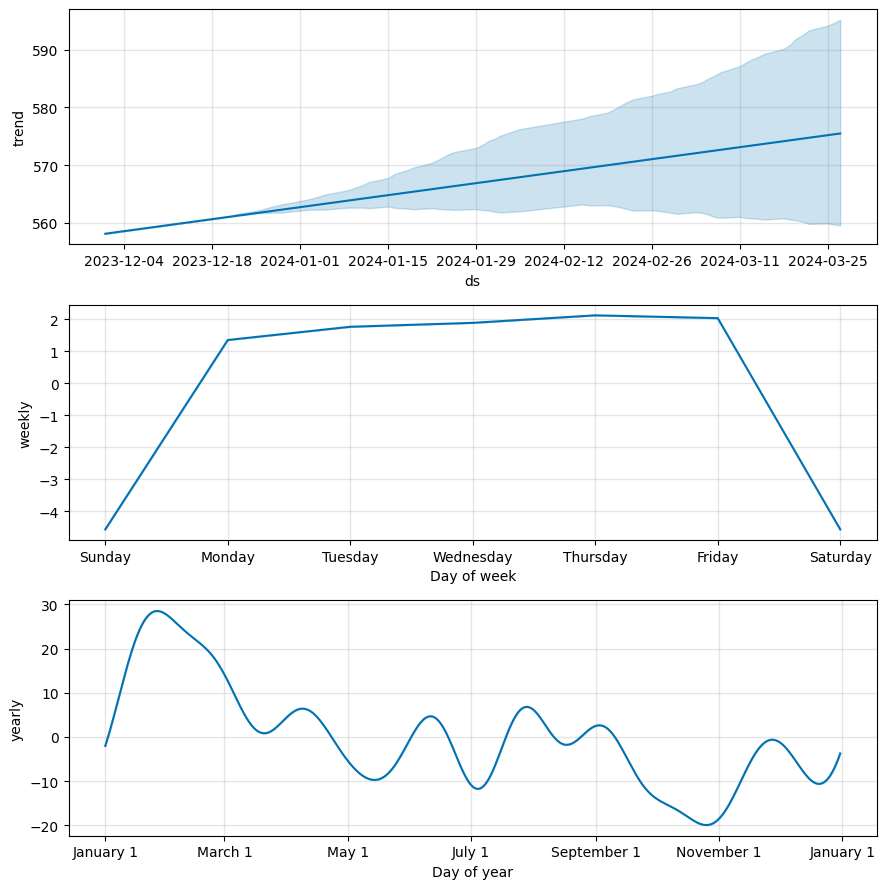

In [24]:
model.plot_components(forecast)

In [25]:
import numpy as np
def mean_abs_perc_err(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean Absolute % Error (MAPE): ", mean_abs_perc_err(y_true = np.asarray(df_test["y"]), y_pred = np.asarray(forecast['yhat'])))


Mean Absolute % Error (MAPE):  10.385219440917568


In [18]:
best_params = {'daily_seasonality': False,
                  'weekly_seasonality': False,
                  'yearly_seasonality': True,
                  'growth': 'logistic',
                  'seasonality_mode': 'multiplicative',
                  'changepoint_prior_scale': 0.1,
                  'seasonality_prior_scale': 0.01
                 }

In [27]:
model2 = Prophet(**best_params)

In [28]:
model2= model2.add_seasonality(name="monthly", period=30, fourier_order=10)
model2= model2.add_seasonality(name="quarterly", period=92.25, fourier_order=10)
model2.add_country_holidays("US")
data['cap']= data["y"].max() + data["y"].std() * 0.05
model2.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1g19b5zb/3t0gn7z0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1g19b5zb/aomr28pr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46104', 'data', 'file=/tmp/tmp1g19b5zb/3t0gn7z0.json', 'init=/tmp/tmp1g19b5zb/aomr28pr.json', 'output', 'file=/tmp/tmp1g19b5zb/prophet_modeli01gb0az/prophet_model-20240328133114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:31:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:31:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


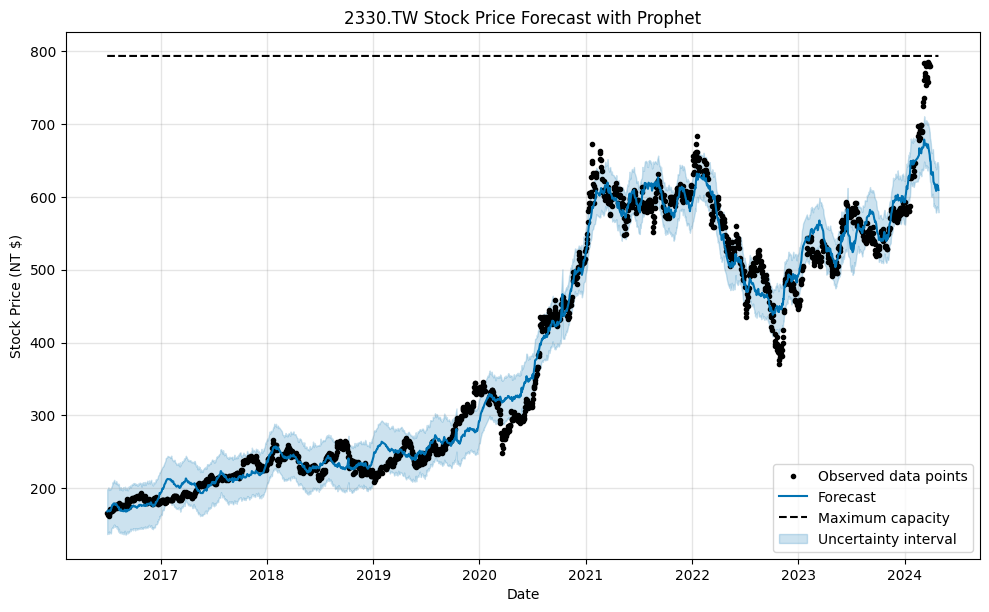

In [31]:
future = model2.make_future_dataframe(periods=30)
future['cap'] = data['cap'].max()
forecast2 = model2.predict(future)

fig1 = model2.plot(forecast2)
plt.title(f'{tick} Stock Price Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Stock Price (NT $)')
plt.legend()
plt.show()

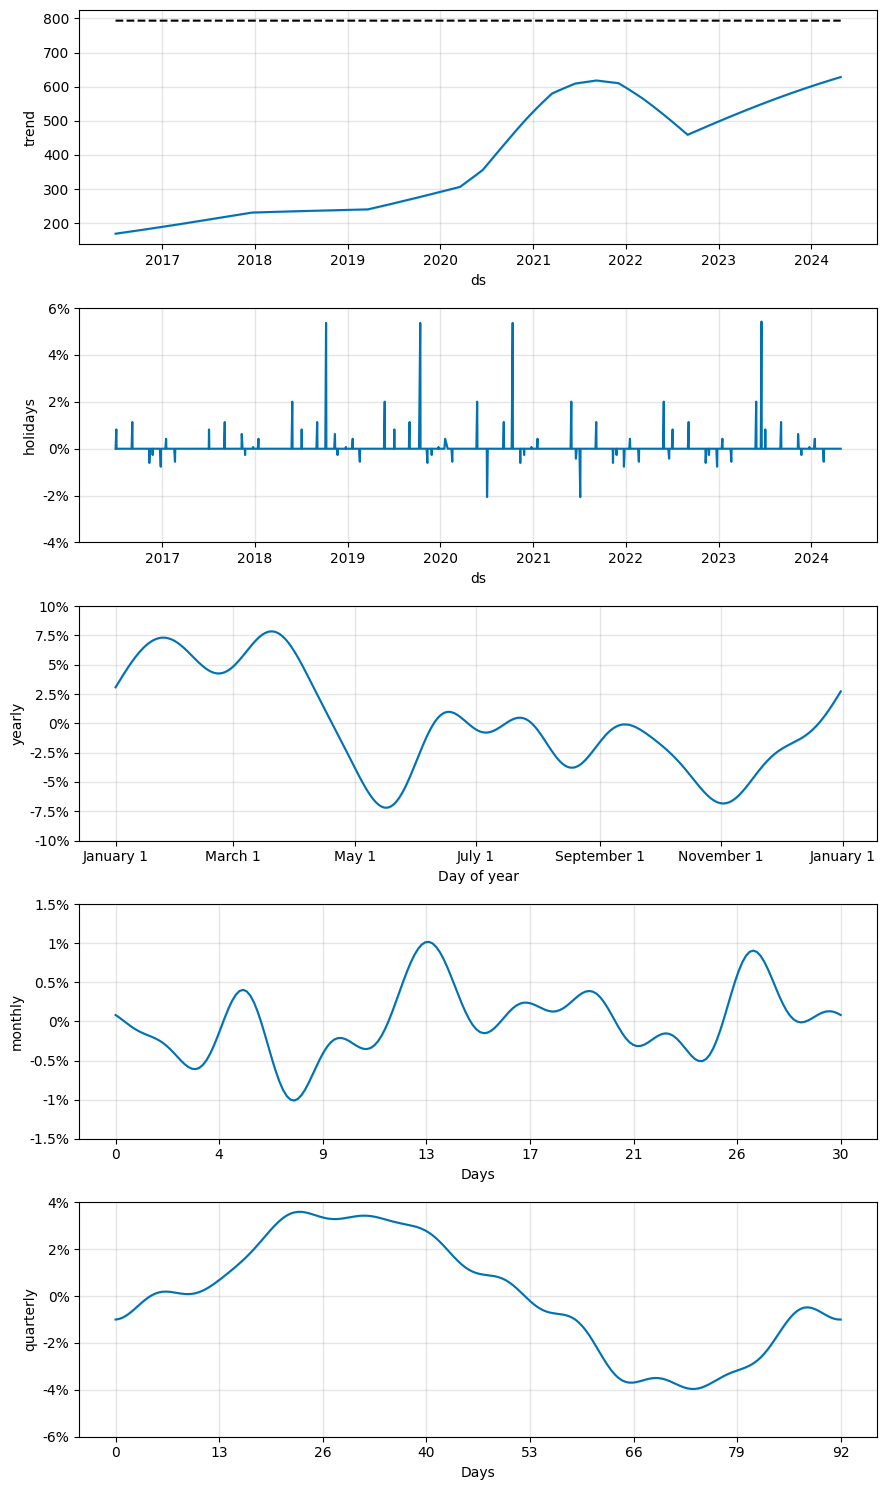

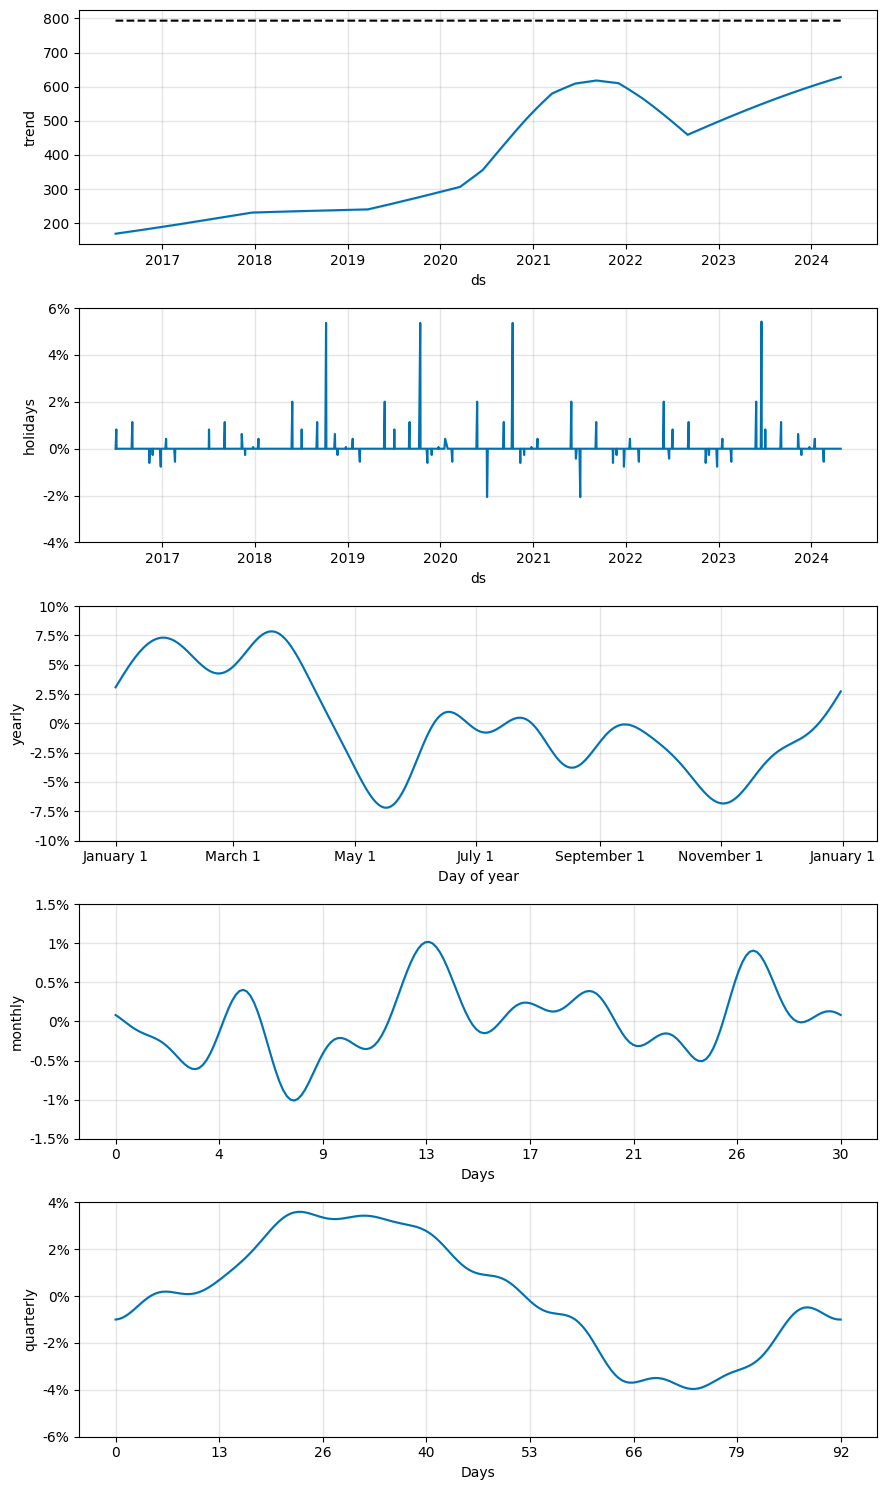

In [32]:
model2.plot_components(forecast2)

In [33]:
!pip install -U xgboost catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 1.6 MB/s eta 0:00:00


In [6]:
!pip install  pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 14.7 MB/s eta 0:00:00
  Using cached scikit_learn-1.4.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from pycaret.regression import *

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
data=df[['Open', 'High', 'Low','Volume','Close']].copy()
data.index=df['Date'].values

In [11]:
from pycaret.regression import *
setup(data = data, target = 'Close',session_id=123)

,Description,Value
0,Session id,123
1,Target,Close
2,Target type,Regression
3,Original data shape,"(1885, 5)"
4,Transformed data shape,"(1885, 5)"
5,Transformed train set shape,"(1319, 5)"
6,Transformed test set shape,"(566, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [12]:

best = compare_models(n_select = 3)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,1.5420,5.0059,2.2100,0.9998,0.0051,0.0039,0.7110
br,Bayesian Ridge,1.5423,5.0050,2.2100,0.9998,0.0051,0.0039,0.0220
ridge,Ridge Regression,1.5420,5.0058,2.2100,0.9998,0.0051,0.0039,0.0220
llar,Lasso Least Angle Regression,1.6715,5.5740,2.3454,0.9998,0.0054,0.0043,0.0260
lar,Least Angle Regression,1.8214,7.0277,2.6409,0.9997,0.0062,0.0047,0.0240
rf,Random Forest Regressor,1.9779,9.0307,2.9820,0.9997,0.0069,0.0050,0.5230
et,Extra Trees Regressor,1.9159,8.1239,2.8341,0.9997,0.0067,0.0049,0.2630
gbr,Gradient Boosting Regressor,2.1628,10.1225,3.1573,0.9996,0.0077,0.0057,0.1850
lasso,Lasso Regression,2.4890,13.5565,3.6464,0.9995,0.0087,0.0064,0.0260
en,Elastic Net,2.4719,13.3609,3.6201,0.9995,0.0086,0.0064,0.0260


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [13]:
ridge = create_model('ridge',fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5893,5.1447,2.2682,0.9998,0.0056,0.0042
1,1.5728,4.6158,2.1484,0.9998,0.0048,0.0040
2,1.5220,4.2544,2.0626,0.9998,0.0050,0.0040
3,1.2893,2.9823,1.7269,0.9999,0.0044,0.0035
4,1.4003,3.7977,1.9488,0.9999,0.0045,0.0036
5,1.5740,4.9580,2.2267,0.9998,0.0054,0.0040
6,1.5562,4.7563,2.1809,0.9998,0.0048,0.0037
7,1.7501,9.8131,3.1326,0.9996,0.0065,0.0043
8,1.4772,4.3091,2.0758,0.9998,0.0049,0.0038


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
# Tuning ridge
ridge_params = {'alpha' : [0.02,0.024,0.025,0.025,0.026,0.03]}
tune_ridge = tune_model(ridge, n_iter=1000, optimize='RMSE',custom_grid = ridge_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5892,5.1444,2.2681,0.9998,0.0056,0.0042
1,1.5728,4.6160,2.1485,0.9998,0.0048,0.0040
2,1.5220,4.2541,2.0625,0.9998,0.0050,0.0040
3,1.2893,2.9822,1.7269,0.9999,0.0044,0.0035
4,1.4003,3.7974,1.9487,0.9999,0.0045,0.0036
5,1.5740,4.9584,2.2267,0.9998,0.0054,0.0040
6,1.5562,4.7566,2.1810,0.9998,0.0048,0.0037
7,1.7501,9.8147,3.1328,0.9996,0.0065,0.0043
8,1.4772,4.3092,2.0759,0.9998,0.0049,0.0038


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 6 candidates, totalling 60 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


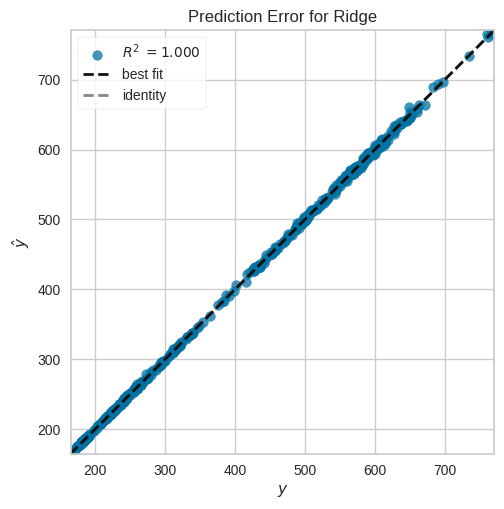

In [16]:
# Error plot
plot_model(tune_ridge, plot = 'error')

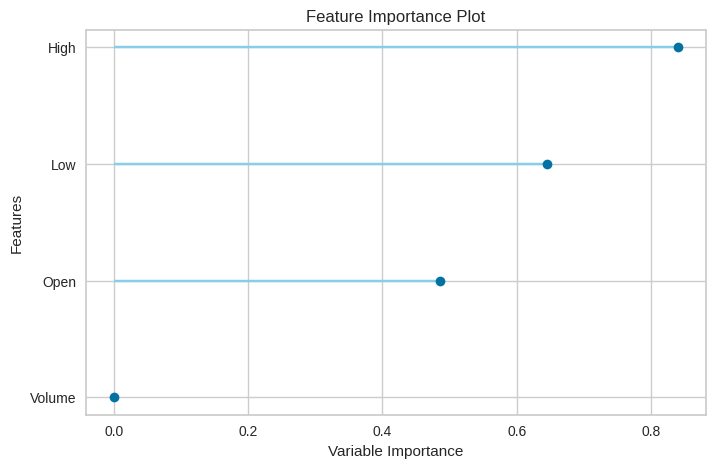

In [17]:
# Importance Feature Plot
plot_model(tune_ridge, plot = 'feature')

In [18]:
# Finalizing model
final_ridge_model = finalize_model(tune_ridge)

In [20]:
# Predicting last 2 years
prediction = predict_model(final_ridge_model,
                          data = data)
prediction

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,1.5217,4.7200,2.1725,0.9998,0.0050,0.0038


,Open,High,Low,Volume,Close,prediction_label
2016-07-01,164.5,166.0,163.5,36212000,166.0,164.929697
2016-07-04,165.5,166.5,164.5,25724000,166.0,165.593686
2016-07-05,165.0,165.5,164.0,16346000,164.0,164.750282
2016-07-06,163.0,163.0,160.5,34803000,161.5,161.202337
2016-07-07,163.5,165.0,163.0,23769000,164.5,164.356556
...,...,...,...,...,...,...
2024-03-22,788.0,789.0,775.0,30660820,785.0,779.656049
2024-03-25,783.0,788.0,779.0,19877101,780.0,784.021947
2024-03-26,788.0,792.0,776.0,40990702,782.0,782.732153
2024-03-27,785.0,785.0,779.0,18794479,779.0,780.549518


In [23]:
import plotly.express as px
fig = px.line(round(prediction,2),
              x = prediction.index,
              y = ['Close','prediction_label'],
             title = '2230')
newnames = {'Close':'Closing Price', 'prediction_label': 'Predicted Price'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.update_traces(line=dict(width=2.5))
fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
     title='2330',
    margin=dict(l=0, r=0, t=80, b=0),
    font=dict(size=14)
)